# Context
The objective of this project is to apply exploratory analysis and regression techniques to identify which features affect home prices the most in the Melbourne Housing Market.

# Data Pre-Processing
The first step is to load the data and gain a better understanding of the information each column contains.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt

In [2]:
# read data
mlb = pd.read_csv('Melbourne_housing_FULL.csv')
# View first few records
mlb.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
# Number of rows and columns
print(mlb.shape)

(31420, 21)


## Variable Types

### Categorical Variables
Based on the information below, the following variables: 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname' will need to be specified as categories rather than general objects.

In addition, the Date variable will need to be converted to a date object.

In [4]:
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 21 columns):
Suburb           31420 non-null object
Address          31420 non-null object
Rooms            31420 non-null int64
Type             31420 non-null object
Price            24589 non-null float64
Method           31420 non-null object
SellerG          31420 non-null object
Date             31420 non-null object
Distance         31419 non-null float64
Postcode         31419 non-null float64
Bedroom2         24211 non-null float64
Bathroom         24205 non-null float64
Car              23821 non-null float64
Landsize         20621 non-null float64
BuildingArea     12569 non-null float64
YearBuilt        14294 non-null float64
CouncilArea      31417 non-null object
Lattitude        24434 non-null float64
Longtitude       24434 non-null float64
Regionname       31417 non-null object
Propertycount    31417 non-null float64
dtypes: float64(12), int64(1), object(8)
memory usage: 5.0+ M

In [5]:
# Identify the object columns
print(mlb.select_dtypes(['object']).columns)

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
       'Regionname'],
      dtype='object')


In [6]:
# Convert objects to categorical variables
obj_cats = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in obj_cats:
    mlb[colname] = mlb[colname].astype('category')

In [7]:
# Convert to date object
mlb['Date'] = pd.to_datetime(mlb['Date'])

### numeric variables
A statistical summary of the numeric variables above indicates that Postcode is being treated as numeric when it should be identified as categorical. This feature will need to be converted to the correct data type.

In [8]:
mlb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,31420.0,3.019764e+00,0.974266,1.00000,2.000000,3.0000,4.000000e+00,1.600000e+01
Price,24589.0,1.048342e+06,641515.639269,85000.00000,635000.000000,870000.0000,1.292000e+06,1.120000e+07
Distance,31419.0,1.104643e+01,6.696776,0.00000,6.400000,10.2000,1.390000e+01,4.810000e+01
Postcode,31419.0,3.115053e+03,107.223963,3000.00000,3049.000000,3103.0000,3.155000e+03,3.978000e+03
Bedroom2,24211.0,3.051588e+00,0.990758,0.00000,2.000000,3.0000,4.000000e+00,3.000000e+01
Bathroom,24205.0,1.610576e+00,0.723262,0.00000,1.000000,2.0000,2.000000e+00,1.200000e+01
Car,23821.0,1.703455e+00,1.002708,0.00000,1.000000,2.0000,2.000000e+00,2.600000e+01
Landsize,20621.0,5.880684e+02,3525.370243,0.00000,208.000000,501.0000,6.670000e+02,4.330140e+05
BuildingArea,12569.0,1.584266e+02,415.300783,0.00000,100.000000,134.0000,1.850000e+02,4.451500e+04
YearBuilt,14294.0,1.965319e+03,37.296614,1196.00000,1940.000000,1970.0000,2.000000e+03,2.106000e+03


In [9]:
# Convert numerical variable to categorical
num_cats = ['Postcode']

for colname in num_cats:
    mlb[colname] = mlb[colname].astype('category')
    
# Confirm changes
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 21 columns):
Suburb           31420 non-null category
Address          31420 non-null category
Rooms            31420 non-null int64
Type             31420 non-null category
Price            24589 non-null float64
Method           31420 non-null category
SellerG          31420 non-null category
Date             31420 non-null datetime64[ns]
Distance         31419 non-null float64
Postcode         31419 non-null category
Bedroom2         24211 non-null float64
Bathroom         24205 non-null float64
Car              23821 non-null float64
Landsize         20621 non-null float64
BuildingArea     12569 non-null float64
YearBuilt        14294 non-null float64
CouncilArea      31417 non-null category
Lattitude        24434 non-null float64
Longtitude       24434 non-null float64
Regionname       31417 non-null category
Propertycount    31417 non-null float64
dtypes: category(8), datetime64[ns](1)

## Duplicate Variables
According to dataset documentation, 'Rooms' and 'Bedroom2' both contain information on the number of rooms of a home has, but reported from different sources. I will investigate these columns further to determine if one should be removed from the dataset.

In [10]:
# Exmaine Rooms and bedroom2

mlb['Rooms v Bedroom2'] = mlb['Rooms'] - mlb['Bedroom2']

mlb

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,0.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-04-03,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0,0.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-04-06,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0,1.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,2016-06-08,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0,1.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,2016-06-08,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0,-2.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,2016-06-08,2.5,3067.0,...,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0,-1.0


The differences between these variables are minimal so keeping both would only be duplicating information. Thus, the Bedroom2 feature will be removed from the data set altogether to allow for better analysis downstream.

In [11]:
# Drop columns
mlb = mlb.drop(['Bedroom2','Rooms v Bedroom2'],1)

### Feature Engineering
The dataset contains the year the home was built. Although this is being measured by the specific year, what this variable is really probing is the age of the home. As such, home age can be expressed in terms of historic (greater than 50 years old) vs non-historic (less than 50 years old) to get the heart of this information in a more condensed way, allowing for better analysis and visualization.

In [12]:
# Add age variable
mlb['Age'] = 2018 - mlb['YearBuilt']
# Identify historic homes
mlb['Historic'] = np.where(mlb['Age']>=50,'Historic','Contemporary')
# Convert to category
mlb['Historic'] = mlb['Historic'].astype('category')

### MISSING DATA
Based on a quick look at the number of entries for each variable, there appears to be missing information in the dataset. I will explore which features are missing the most information.

In [13]:
# Number of entries
mlb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31420 entries, 0 to 31419
Data columns (total 22 columns):
Suburb           31420 non-null category
Address          31420 non-null category
Rooms            31420 non-null int64
Type             31420 non-null category
Price            24589 non-null float64
Method           31420 non-null category
SellerG          31420 non-null category
Date             31420 non-null datetime64[ns]
Distance         31419 non-null float64
Postcode         31419 non-null category
Bathroom         24205 non-null float64
Car              23821 non-null float64
Landsize         20621 non-null float64
BuildingArea     12569 non-null float64
YearBuilt        14294 non-null float64
CouncilArea      31417 non-null category
Lattitude        24434 non-null float64
Longtitude       24434 non-null float64
Regionname       31417 non-null category
Propertycount    31417 non-null float64
Age              14294 non-null float64
Historic         31420 non-null catego

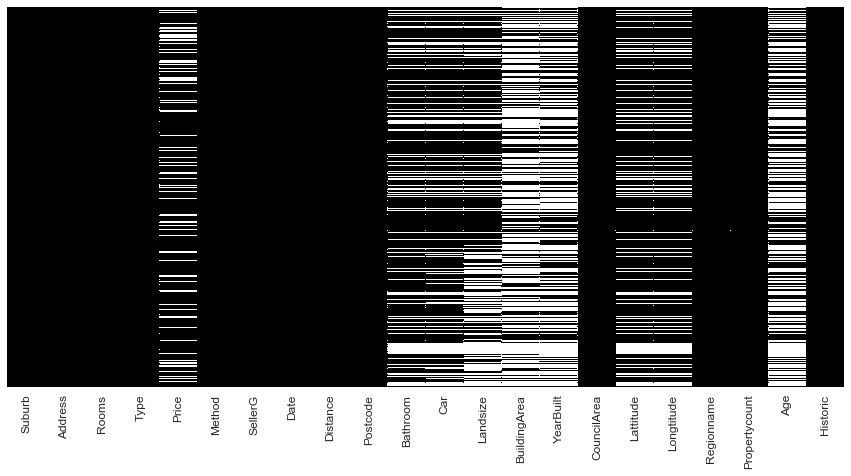

In [19]:
# Visualizing missing values
fig, ax = plt.subplots(figsize=(15,7))
sns.set(font_scale=1.2)
sns.heatmap(mlb.isnull(),yticklabels = False, cbar = False, cmap = 'Greys_r')
plt.show()

In [22]:
# count of missing values
mlb.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             6831
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bathroom          7215
Car               7599
Landsize         10799
BuildingArea     18851
YearBuilt        17126
CouncilArea          3
Lattitude         6986
Longtitude        6986
Regionname           3
Propertycount        3
Age              17126
Historic             0
dtype: int64

In [24]:
# Percentage of missing values
mlb.isnull().sum()/len(mlb)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.740929
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.003183
Postcode          0.003183
Bathroom         22.963081
Car              24.185232
Landsize         34.369828
BuildingArea     59.996817
YearBuilt        54.506684
CouncilArea       0.009548
Lattitude        22.234246
Longtitude       22.234246
Regionname        0.009548
Propertycount     0.009548
Age              54.506684
Historic          0.000000
dtype: float64

There are a significant amount of missing values in Price, Bathroom, Car, Landsize, Building Area, YearBuilt, Council Area, Lattitude, and Longitude. To allow for a more complete analysis, observations missing any data will be removed from the dataset.

In [29]:
# Remove rows missing data
mlb = mlb.dropna()
mlb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8059 entries, 2 to 31413
Data columns (total 22 columns):
Suburb           8059 non-null category
Address          8059 non-null category
Rooms            8059 non-null int64
Type             8059 non-null category
Price            8059 non-null float64
Method           8059 non-null category
SellerG          8059 non-null category
Date             8059 non-null datetime64[ns]
Distance         8059 non-null float64
Postcode         8059 non-null category
Bathroom         8059 non-null float64
Car              8059 non-null float64
Landsize         8059 non-null float64
BuildingArea     8059 non-null float64
YearBuilt        8059 non-null float64
CouncilArea      8059 non-null category
Lattitude        8059 non-null float64
Longtitude       8059 non-null float64
Regionname       8059 non-null category
Propertycount    8059 non-null float64
Age              8059 non-null float64
Historic         8059 non-null category
dtypes: category(9),

### OUTLIERS
The statistical summary revealed minimum values of zero for Landsize and BuildingArea that seem odd. Also, there is a max price of $8.4 million in the dataset. These observations will need to be investigated further to determine their validity and whether they should be included in the dataset for analysis.

In [33]:
mlb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8059.0,3.059933e+00,0.972318,1.00000,2.000000,3.00000,4.000000e+00,1.200000e+01
Price,8059.0,1.083538e+06,675741.835076,131000.00000,635000.000000,890000.00000,1.335000e+06,9.000000e+06
Distance,8059.0,1.092726e+01,6.672705,0.00000,6.400000,9.90000,1.380000e+01,4.740000e+01
Bathroom,8059.0,1.626753e+00,0.722753,1.00000,1.000000,2.00000,2.000000e+00,9.000000e+00
Car,8059.0,1.663234e+00,0.967197,0.00000,1.000000,2.00000,2.000000e+00,1.000000e+01
Landsize,8059.0,5.147687e+02,1004.332868,0.00000,195.000000,462.00000,6.510000e+02,4.046900e+04
BuildingArea,8059.0,1.471319e+02,89.014659,0.00000,97.000000,130.00000,1.780000e+02,3.112000e+03
YearBuilt,8059.0,1.965317e+03,37.144409,1196.00000,1945.000000,1970.00000,2.000000e+03,2.018000e+03
Lattitude,8059.0,-3.780595e+01,0.088149,-38.17436,-37.857865,-37.79999,-3.775122e+01,-3.740720e+01
Longtitude,8059.0,1.449916e+02,0.115483,144.42379,144.921865,144.99780,1.450623e+02,1.455264e+02


In [35]:
mlb[mlb['Age']>800]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
16424,Mount Waverley,5 Armstrong St,3,h,1200000.0,VB,McGrath,2017-06-24,14.2,3149.0,...,807.0,117.0,1196.0,Monash City Council,-37.86788,145.12121,Eastern Metropolitan,13366.0,822.0,Historic


In [37]:
mlb[mlb['BuildingArea']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
7211,North Melbourne,19 Shands La,2,t,841000.0,S,Jellis,2017-04-03,2.3,3051.0,...,215.0,0.0,2000.0,Melbourne City Council,-37.79530,144.94370,Northern Metropolitan,6821.0,18.0,Contemporary
19775,Balwyn North,14 Wanbrow Av,5,h,1950000.0,S,RT,2017-03-09,9.7,3104.0,...,743.0,0.0,1949.0,Boroondara City Council,-37.80235,145.09311,Southern Metropolitan,7809.0,69.0,Historic
19840,Bundoora,22 Moreton Cr,3,h,814000.0,S,Barry,2017-03-09,12.1,3083.0,...,542.0,0.0,1970.0,Banyule City Council,-37.70861,145.05691,Northern Metropolitan,10175.0,48.0,Contemporary
20223,Roxburgh Park,16 Sandover Dr,4,h,570000.0,S,Raine,2017-03-09,20.6,3064.0,...,504.0,0.0,2000.0,Hume City Council,-37.61419,144.93448,Northern Metropolitan,5833.0,18.0,Contemporary
20262,Thornbury,19/337 Station St,3,t,900000.0,VB,Jellis,2017-03-09,7.0,3071.0,...,120.0,0.0,2000.0,Darebin City Council,-37.76343,145.02096,Northern Metropolitan,8870.0,18.0,Contemporary
22040,Prahran,6 Aberdeen Rd,3,h,1390000.0,S,Marshall,2017-08-19,4.6,3181.0,...,125.0,0.0,2002.0,Stonnington City Council,-37.85257,145.00296,Southern Metropolitan,7717.0,16.0,Contemporary
22507,Huntingdale,33 Beauford St,3,h,1205000.0,SA,FN,2017-09-23,12.3,3166.0,...,622.0,0.0,1960.0,Monash City Council,-37.90823,145.10851,Southern Metropolitan,768.0,58.0,Historic
22931,Balwyn North,1 Hosken St,5,h,2800000.0,S,Marshall,2017-08-26,9.7,3104.0,...,1173.0,0.0,1960.0,Boroondara City Council,-37.80385,145.09094,Southern Metropolitan,7809.0,58.0,Historic
22994,Brighton East,60 Cummins Rd,3,h,1650000.0,SP,Buxton,2017-08-26,10.3,3187.0,...,623.0,0.0,1920.0,Bayside City Council,-37.92698,145.02673,Southern Metropolitan,6938.0,98.0,Historic
23022,Bundoora,37 Greenwood Dr,4,h,815000.0,S,Ray,2017-08-26,12.1,3083.0,...,525.0,0.0,1965.0,Banyule City Council,-37.70765,145.05556,Northern Metropolitan,10175.0,53.0,Historic


In [39]:
mlb[mlb['Landsize']==0]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age,Historic
25,Abbotsford,123/56 Nicholson St,2,u,750000.0,S,Biggin,2016-12-11,2.5,3067.0,...,0.0,94.00,2009.0,Yarra City Council,-37.80780,144.99650,Northern Metropolitan,4019.0,9.0,Contemporary
42,Abbotsford,6/219 Nicholson St,2,u,500000.0,S,Collins,2016-06-18,2.5,3067.0,...,0.0,60.00,1970.0,Yarra City Council,-37.80150,144.99720,Northern Metropolitan,4019.0,48.0,Contemporary
57,Abbotsford,11/205 Gipps St,1,u,470000.0,S,Nelson,2016-07-26,2.5,3067.0,...,0.0,50.00,2013.0,Yarra City Council,-37.80550,144.99610,Northern Metropolitan,4019.0,5.0,Contemporary
67,Airport West,50 Bedford St,3,h,730000.0,VB,Nelson,2016-03-12,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,53.0,Historic
68,Airport West,50 Bedford St,3,h,770000.0,SP,Nelson,2017-04-03,13.5,3042.0,...,0.0,145.00,1965.0,Moonee Valley City Council,-37.72030,144.87550,Western Metropolitan,3464.0,53.0,Historic
88,Airport West,13 Etzel St,3,h,805000.0,S,Nelson,2016-10-12,13.5,3042.0,...,0.0,105.00,1950.0,Moonee Valley City Council,-37.72170,144.87830,Western Metropolitan,3464.0,68.0,Historic
155,Albert Park,4a Gatehouse La,3,h,1370000.0,S,Greg,2016-12-06,3.3,3206.0,...,0.0,85.00,2000.0,Port Phillip City Council,-37.84510,144.95110,Southern Metropolitan,3280.0,18.0,Contemporary
177,Albert Park,13/52 Moubray St,1,u,442500.0,S,Marshall,2017-02-25,3.3,3206.0,...,0.0,34.00,1970.0,Port Phillip City Council,-37.84210,144.95170,Southern Metropolitan,3280.0,48.0,Contemporary
217,Alphington,5/5 Yarana Rd,2,u,390000.0,VB,Nelson,2016-05-22,6.4,3078.0,...,0.0,60.00,1960.0,Darebin City Council,-37.77730,145.03140,Northern Metropolitan,2211.0,58.0,Historic
219,Alphington,1/14 Fulham Rd,2,u,512000.0,S,Love,2017-02-25,6.4,3078.0,...,0.0,61.00,1965.0,Darebin City Council,-37.78050,145.02620,Northern Metropolitan,2211.0,53.0,Historic


After additional research, I determined that a zero land size could be indicative of 'zero-lot-line' homes - residential real estate in which the structure comes up to or very near the edge of the property line. Therefore, these observations are valid and will remain the data set.

However, the observation with a 'zero' BuildingArea will be removed because it is not possible for a home to have a size of zero. Also, this observation is priced usually high at $8.4M (the outlier identified earlier), further confirming a possible error in the data point. For these two reasons, this observation will be removed.

In [41]:
# remove outlier
mlb = mlb[mlb['BuildingArea']!=0]

# Confirm removal
mlb.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,8021.0,3.058097e+00,0.972498,1.00000,2.00000,3.00000,4.000000e+00,1.200000e+01
Price,8021.0,1.082980e+06,675222.698739,131000.00000,635000.00000,890000.00000,1.335000e+06,9.000000e+06
Distance,8021.0,1.091671e+01,6.670471,0.00000,6.40000,9.90000,1.380000e+01,4.740000e+01
Bathroom,8021.0,1.626231e+00,0.723272,1.00000,1.00000,2.00000,2.000000e+00,9.000000e+00
Car,8021.0,1.662511e+00,0.968160,0.00000,1.00000,2.00000,2.000000e+00,1.000000e+01
Landsize,8021.0,5.140741e+02,1005.054135,0.00000,194.00000,461.00000,6.510000e+02,4.046900e+04
BuildingArea,8021.0,1.478290e+02,88.645903,1.00000,98.00000,130.00000,1.780000e+02,3.112000e+03
YearBuilt,8021.0,1.965271e+03,37.164745,1196.00000,1945.00000,1970.00000,2.000000e+03,2.018000e+03
Lattitude,8021.0,-3.780606e+01,0.087986,-38.17436,-37.85793,-37.80010,-3.775140e+01,-3.740720e+01
Longtitude,8021.0,1.449916e+02,0.115494,144.42379,144.92158,144.99769,1.450623e+02,1.455264e+02


## EXPLORATORY ANALYSIS
### UNIVARIATE
The dependent (or target) variable we are trying to predict in this analysis is Price. This variable appears to be normally distributed and skewed to the right. That is, the majority of homes around 900k with some outliers around 8M.

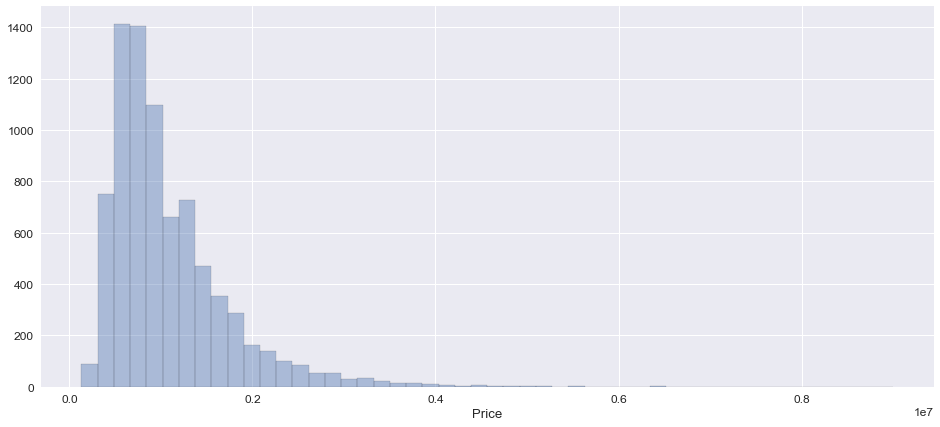

In [49]:
plt.figure(figsize=(16,7))
sns.distplot(mlb['Price'], kde = False,hist_kws=dict(edgecolor="k"))
plt.show()

## BIVARIATE
### Categorical Features
Next, I'll take a look at the relationships between the target variable and the categorical features. Suburb, Address, and Postcode are measures based on location. Rather than using all of these features in the analysis, Regionname would be the best proxy of home location to use for analysis that gets to the heart of this information in a more condensed way.

Based on domain knowledge, a home's real estate agent or council member has a minimal effect on a price relative to other features and will be excluded from further analysis

In [51]:
# Identify categorical features
mlb.select_dtypes(['category']).columns

Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Postcode',
       'CouncilArea', 'Regionname', 'Historic'],
      dtype='object')

In [53]:
# Abbreviate Regionname categories
mlb['Regionname'] = mlb['Regionname'].map({'Northern Metropolitan':'N Metro',
                                            'Western Metropolitan':'W Metro', 
                                            'Southern Metropolitan':'S Metro', 
                                            'Eastern Metropolitan':'E Metro', 
                                            'South-Eastern Metropolitan':'SE Metro', 
                                            'Northern Victoria':'N Vic',
                                            'Eastern Victoria':'E Vic',
                                            'Western Victoria':'W Vic'})

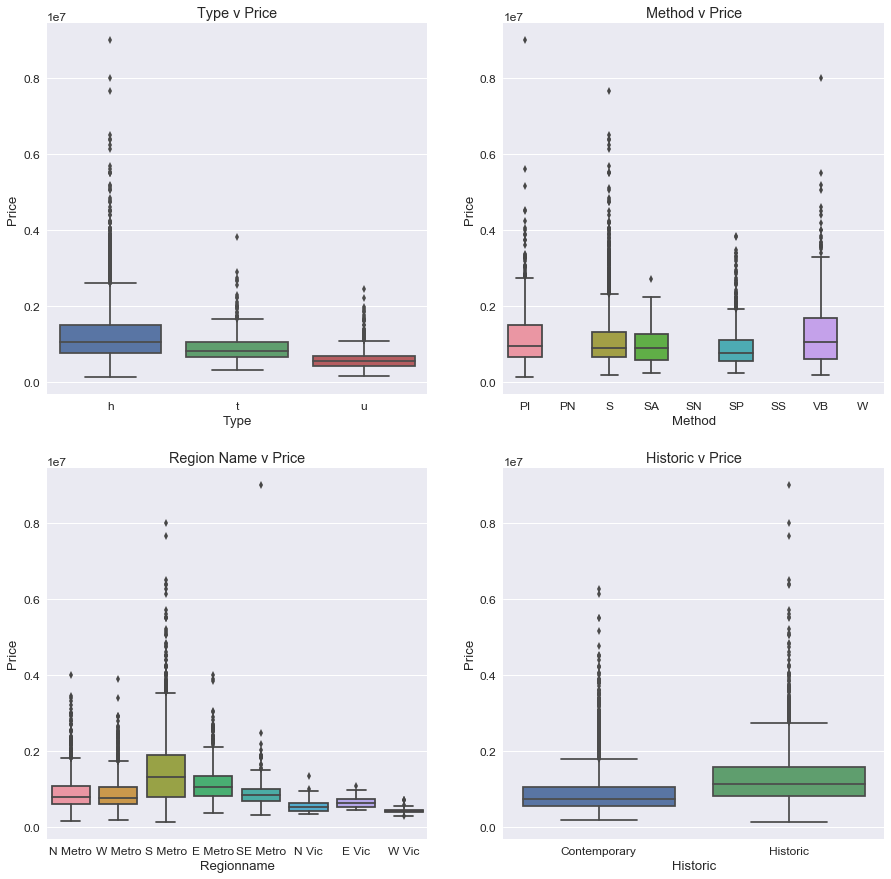

In [54]:
# Suplots of categorical features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(2,2, figsize = (15,15))

# Plot [0,0]
sns.boxplot(data = mlb, x = 'Type', y = 'Price', ax = axes[0,0])
axes[0,0].set_xlabel('Type')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Type v Price')

# Plot [0,1]
sns.boxplot(x = 'Method', y = 'Price', data = mlb, ax = axes[0,1])
axes[0,1].set_xlabel('Method')
#axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Method v Price')

# Plot [1,0]
sns.boxplot(x = 'Regionname', y = 'Price', data = mlb, ax = axes[1,0])
axes[1,0].set_xlabel('Regionname')
#axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Region Name v Price')

# Plot [1,1]
sns.boxplot(x = 'Historic', y = 'Price', data = mlb, ax = axes[1,1])
axes[1,1].set_xlabel('Historic')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Historic v Price')

plt.show()

### Insights
* Median prices for houses are over 1M, townhomes are 800k - 900k and units are approx 500k.
* Home prices with different selling methods are relatively the same across the board.
* Median prices in the Metropolitan Region are higher than than that of Victoria Region - with Southern Metro being the area with the highest median home price (~1.3M).
* With an average price of 1M, historic homes (older than 50 years old) are valued much higher than newer homes in the area, but have more variation in price.

### Numeric Features
Next, I visualize the relationships between numeric features in the dataset and price

In [55]:
mlb.select_dtypes(['float64', 'int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

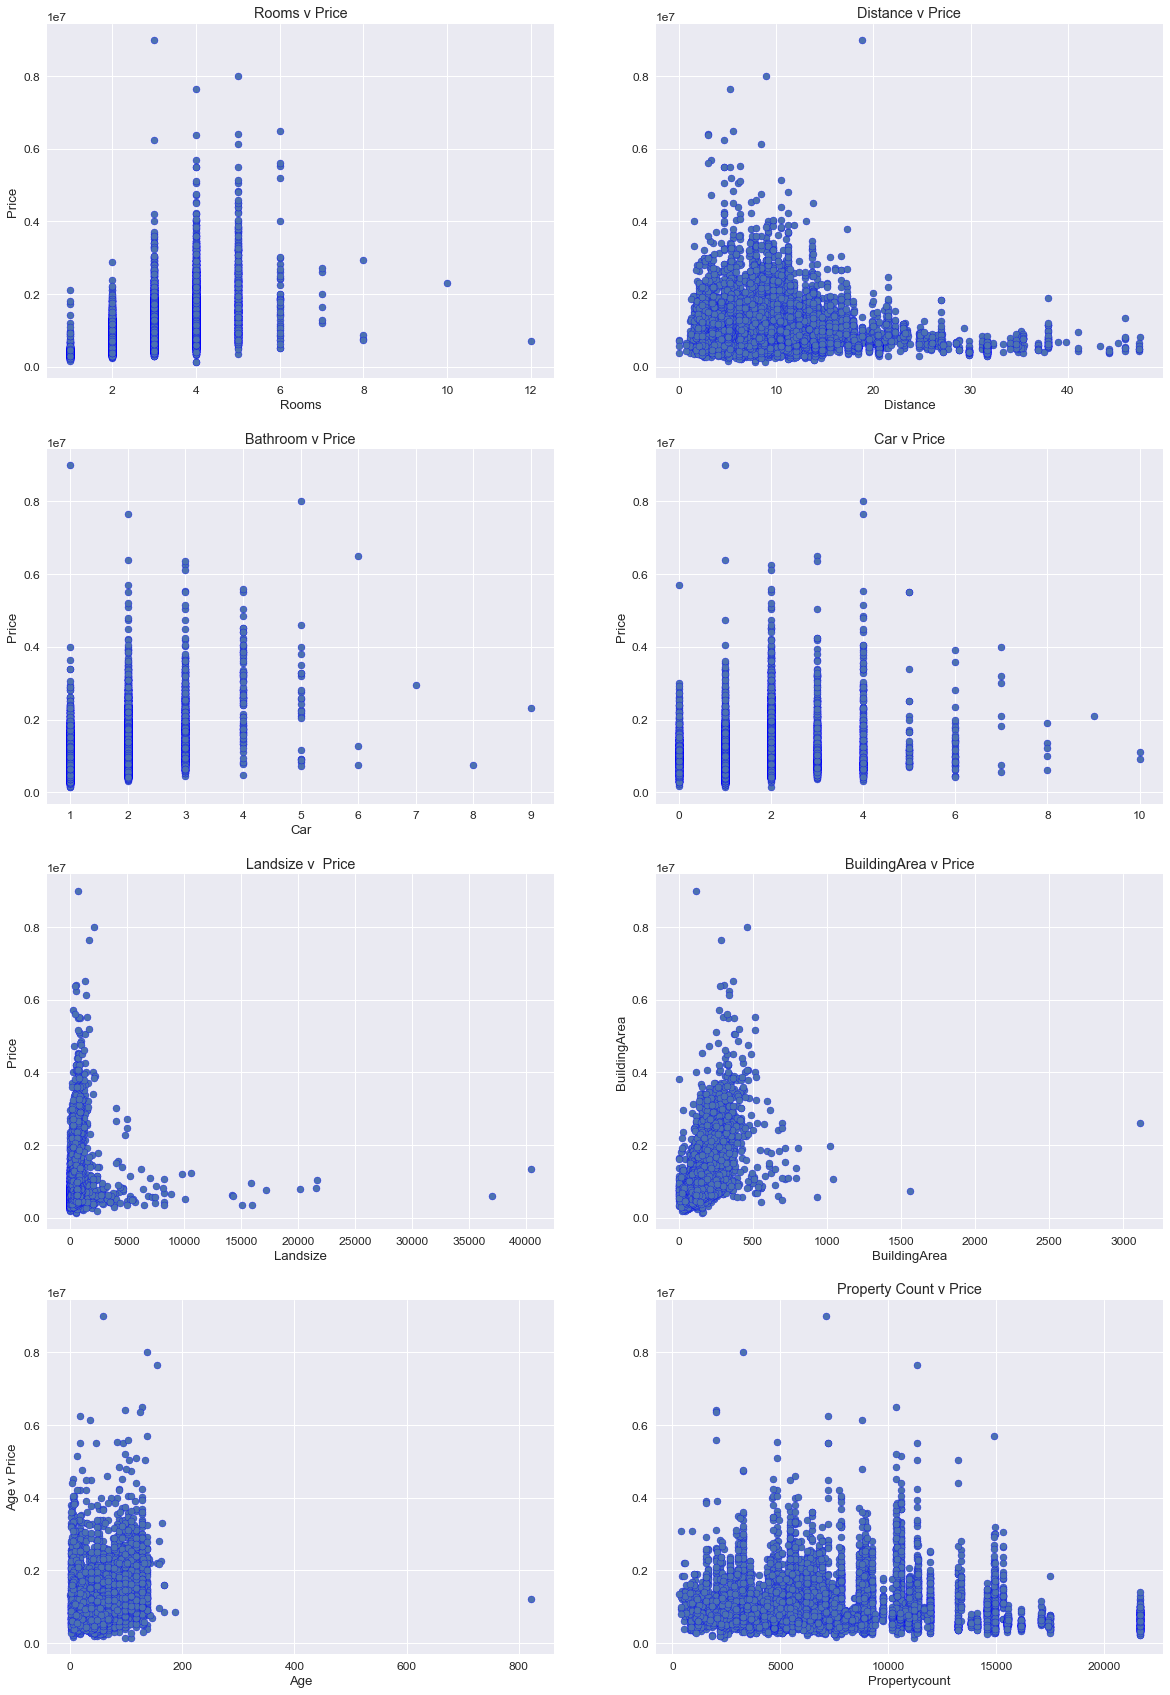

In [56]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = mlb, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = mlb, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = mlb, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')

# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = mlb, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = mlb, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = mlb, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = mlb, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')

# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = mlb, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

### Insights
The majority of homes in the dataset have 4 or 5 rooms.
The most prominent trend is that there is a negative correlation between Distance from Melbourne's Central Business District (CBD) and Price. The most expensive homes (2M or more) tend to be within 20km of the CBD.

### CORRELATION
Next, I explore how all the variables are correlated with one another.

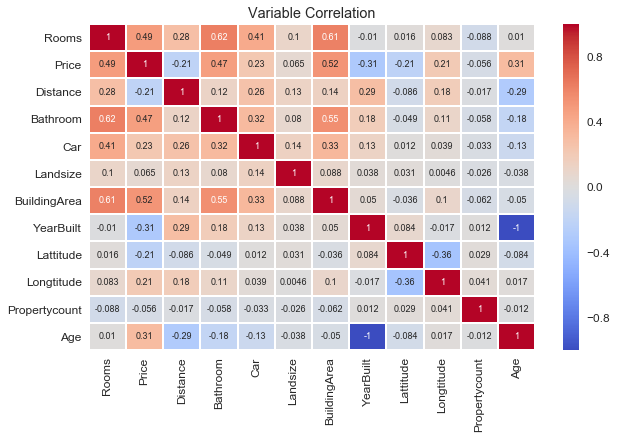

In [60]:
plt.figure(figsize=(10,6))
sns.heatmap(mlb.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')
plt.show()

### Weak Positive Correlation 
Age and Price

### Moderate Positive Correlation
Rooms and Price
Bathrooms and Price
Building Area and Price

The Rooms, Bathroom, and BuildingArea features are also moderately correlated with one another as they are all measures of home size.

## LINEAR REGRESSION

In [62]:
# Identify numeric features
mlb.select_dtypes(['float64','int64']).columns

Index(['Rooms', 'Price', 'Distance', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude', 'Propertycount',
       'Age'],
      dtype='object')

In [63]:
# Split
# Create features variable 
X =mlb[['Rooms', 'Distance', 'Bathroom', 'Car', 'Landsize', 
            'BuildingArea', 'Propertycount','Age']]

# Create target variable
y = mlb['Price']

# Train, test, split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = .20, random_state= 0)

In [64]:
# Fit
# Import model
from sklearn.linear_model import LinearRegression

# Create linear regression object
regressor = LinearRegression()

# Fit model to training data
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [66]:
# Predict
# Predicting test set results
y_pred = regressor.predict(X_test)
y_pred

array([  949501.20356262,   382806.88350694,  1720919.81795296, ...,
        2814366.2236818 ,   895868.0567385 ,   748910.96888594])

### Regression Evaluation Metrics
Three common evaluation metrics for regresson problems:

1. Mean Absolute Error (MAE)
2. Mean Squared Error (MSE)
3. Root Mean Squared Error (RMSE)
All basic variations on the difference between what you predicted and the true values.
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE more popular than MAE, because MSE "punishes" larger errors, tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units (target units) .

All of these are loss functions, because we want to minimize them.

In [67]:
# Score It
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,y_pred))
print('MSE:',metrics.mean_squared_error(y_test,y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE: 309616.394733
MSE: 261371945569.0
RMSE: 511245.484644


RMSE tells us explicitly how much our predictions deviate, on average, from the actual values in the dataset. In this case, our predicted values are 508,212.42 away from the actual value.

In [68]:
# Calculated R Squared
print('R^2 =',metrics.explained_variance_score(y_test,y_pred))

R^2 = 0.453406031727


According to the R-squared, 47.6% of the variance in the dependent variable is explained by the model.

### Analyse the residuals

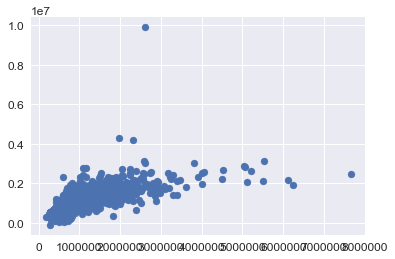

In [74]:
# Actual v predictions scatter
plt.scatter(y_test, y_pred)
plt.show()

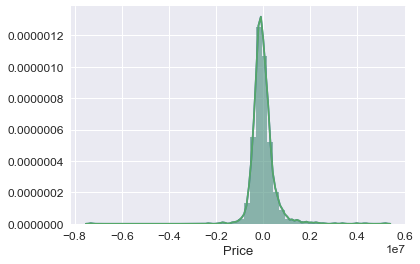

In [72]:
# Histogram of the distribution of residuals
sns.distplot((y_test - y_pred))
plt.show()

### Interpreting the Cofficients

In [73]:
cdf = pd.DataFrame(data = regressor.coef_, index = X.columns, columns = ['Coefficients'])
cdf

,Coefficients
Rooms,112958.283137
Distance,-27006.104193
Bathroom,227346.734174
Car,47309.619895
Landsize,16.981057
BuildingArea,2724.718597
Propertycount,-0.834860
Age,5351.161922
